# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
pd.set_option("display.max_columns", None)

---

# Thu thập dữ liệu

**Dữ liệu được sử dụng trong NoteBook này là thông tin về các khách hàng tham gia cuộc khảo sát để tìm ra khách hàng lý tưởng. Để giúp cho doanh nghiệp hiểu tốt hơn về khách hàng**
> **Context**\
**Problem Statement**\
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
>
>Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

**Phần mô tả của dữ liệu:**
>**Attributes**\
**People**
>
>- ID: Customer's unique identifier
>- Year_Birth: Customer's birth year
>- Education: Customer's education level
>- Marital_Status: Customer's marital status
>- Income: Customer's yearly household income
>- Kidhome: Number of children in customer's household
>- Teenhome: Number of teenagers in customer's household
>- Dt_Customer: Date of customer's enrollment with the company
>- Recency: Number of days since customer's last purchase
>- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
>
>**Products**
>
>- MntWines: Amount spent on wine in last 2 years
>- MntFruits: Amount spent on fruits in last 2 years
>- MntMeatProducts: Amount spent on meat in last 2 years
>- MntFishProducts: Amount spent on fish in last 2 years
>- MntSweetProducts: Amount spent on sweets in last 2 years
>- MntGoldProds: Amount spent on gold in last 2 years
>
>**Promotion**
>
>- NumDealsPurchases: Number of purchases made with a discount
>- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
>- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
>- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
>- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
>- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
>- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
>
>**Place**
>
>- NumWebPurchases: Number of purchases made through the company’s website
>- NumCatalogPurchases: Number of purchases made using a catalogue
>- NumStorePurchases: Number of purchases made directly in stores
>- NumWebVisitsMonth: Number of visits to company’s website in the last month

**Dữ liệu này được Public trên trang Kaggle nhằm mục đích học tập với license như sau:**
> License CC0: Public Domain


**Cám ơn [LavanyaAkash Patel](https://www.kaggle.com/imakash3011) đã cung cấp tập dữ liệu này**


**Mình download dữ liệu tại đây [kaggle](https://www.kaggle.com/imakash3011/customer-personality-analysis)**

---

# Khám phá dữ liệu

## Đọc dữ liệu từ file .csv

In [72]:
mkt_df = pd.read_csv("../Data/marketing_campaign.csv", sep='\t')

In [73]:
mkt_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

## Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

## Dữ liệu có các dòng bị lặp không?

## Mỗi cột có ý nghĩa gì?

## Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [5]:
mkt_df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

Cột `Dt-Customer` nên có kiểu dữ liệu dạng này tháng, nhưng hiện giờ đang có kiểu dữ liệu `object`. Ta hãy thử tìm hiểu về các giá trị của cột này.

In [9]:
mkt_df["Dt_Customer"].sample(10)

616     06-05-2013
1933    01-04-2014
905     09-04-2014
1706    20-09-2012
1091    26-04-2014
638     28-09-2012
1234    02-05-2014
2021    05-04-2013
686     12-09-2012
1587    27-06-2014
Name: Dt_Customer, dtype: object

Ta nên đưa cột này về dạng `datetime` để có thể tiếp tục khám phá (tính min, max, median,...)

---

# Tiền xử lý

In [13]:
mkt_df["Dt_Customer"] = mkt_df["Dt_Customer"].astype("datetime64")

Xem lại kiểu dữ liệu của cột `Dt_Customer`

In [14]:
mkt_df["Dt_Customer"].dtype

dtype('<M8[ns]')

---

# Quay lại bước khám phá dữ liệu

## Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào?

In [39]:
num_cols = mkt_df.select_dtypes(exclude=["object"])

In [40]:
num_cols.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Ta thấy các dữ liệu dạng số không có gì bất thường trong phân bố (*không tính các giá trị bị thiếu*).

## Số-lượng/tỉ-lệ các giá trị thiếu?

In [64]:
num_cols.isna().sum()

ID                      0
Year_Birth              0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Tính % giá trị bị thiếu để quan sát rõ hơn.

In [65]:
num_cols.isna().mean() * 100

ID                     0.000000
Year_Birth             0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

Ta chỉ thấy có cột `Income` có 1 vài giá trị bị thiếu nhưng số lượng rất ít chỉ chiếm khoảng $1.07\%$\
$\to$ bỏ các dòng chứa giá trị bị thiếu. 

----

# Tiền xử lý

Xóa các dòng có chứa giá trị bị thiếu ở cột `Income`

In [83]:
mkt_df.drop(mkt_df[mkt_df["Income"].isna()].index, axis=0, inplace=True)

Kiểm tra lại `dataframe`

In [86]:
mkt_df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

---

# Quay lại bước khám phá dữ liệu

## Với mỗi cột có kiểu dữ liệu không phải dạng số, các giá trị được phân bố như thế nào?

Lấy ra các cột dữ liệu không phải dạng số

In [41]:
cat_cols = mkt_df.select_dtypes(include=["object"])

Tên của các cột

In [46]:
cat_cols.columns

Index(['Education', 'Marital_Status'], dtype='object')

Xem phân bố của min và max

In [58]:
def min(df:pd.DataFrame):
    return df.value_counts().idxmin()

def max(df:pd.DataFrame):
    return df.value_counts().idxmax()

cat_cols.apply([min, max])

,Education,Marital_Status
min,Basic,YOLO
max,Graduation,Married


Visualize để xem rõ hơn về phân bố của các giá trị này

- cột `Education`

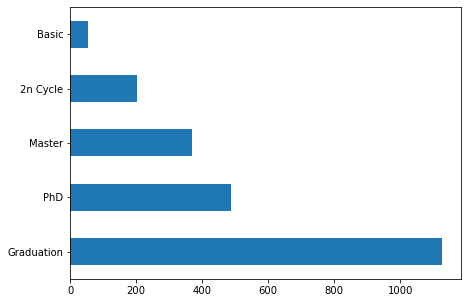

In [61]:
cat_cols["Education"].value_counts().plot.barh(figsize=(7,5));

- cột `Marital_Status`

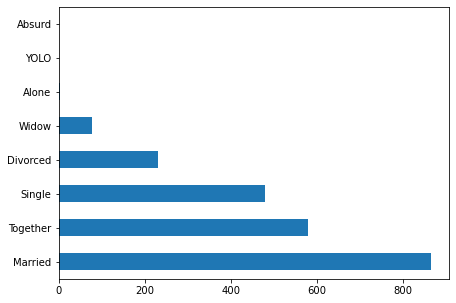

In [63]:
cat_cols["Marital_Status"].value_counts().plot.barh(figsize=(7,5));

# Đặt câu hỏi 